Text(0.5,0,'Population of City in 10,000s')

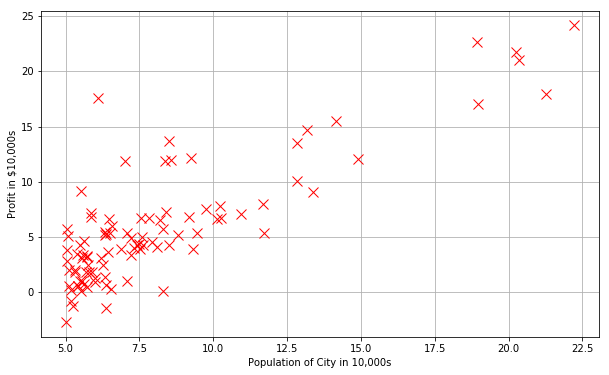

In [18]:
import numpy as np
import matplotlib.pyplot as plt

datafile = "ex1data1.txt"
# print(datafile)
#devided by , and create two cols as clo0 ans clo1, which keep x and y sperately
cols = np.loadtxt(datafile, delimiter=",", usecols=(0,1),unpack=True)
#对第一行转置
X = np.transpose(np.array(cols[:-1]))
#对倒数第一行转置
y = np.transpose(np.array(cols[-1:]))
m = y.size
#对每一行0的位置插入1
X= np.insert(X, 0, 1, axis=1)
# print(X)
plt.figure(figsize=(10,6))
plt.plot(X[:,1], y,"rx", markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

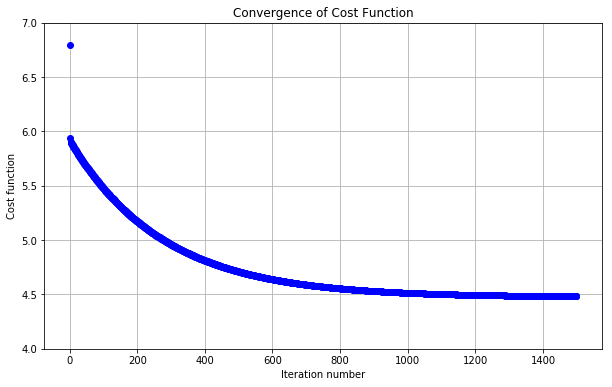

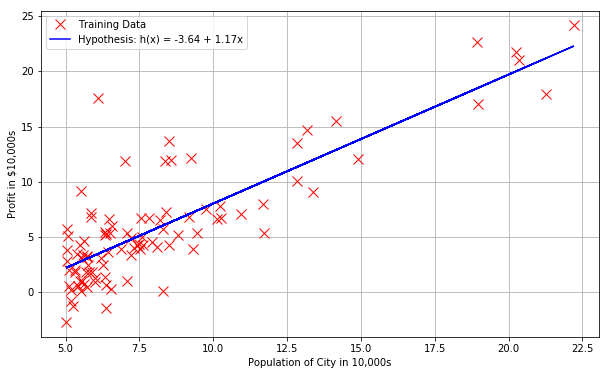

In [25]:
import numpy as np
import matplotlib.pyplot as plt

datafile = "ex1data1.txt"
# print(datafile)
#devided by , and create two cols as clo0 ans clo1, which keep x and y sperately
cols = np.loadtxt(datafile, delimiter=",", usecols=(0,1),unpack=True)
#对第一行转置
X = np.transpose(np.array(cols[:-1]))
#对倒数第一行转置
y = np.transpose(np.array(cols[-1:]))
m = y.size
#对每一行0的位置插入1
X= np.insert(X, 0, 1, axis=1)

iteration = 1500
learning_rate = 0.01
#h = θ*X 的假设
def h(theta, X):
    return np.dot(X, theta)

def computCostFunction(mytheta, X, y):
    return float((1./(2*m))*np.dot((h(mytheta, X)-y).T, (h(mytheta, X)-y)))

initial_theta = np.zeros((X.shape[1], 1))
# print(computCostFunction(initial_theta, X, y))

def GrandientDesend(X, theta_start = np.zeros(2)):
    theta = theta_start
    jvec = []
    thetahistory = []
    for i in range(iteration):
        tmptheta = theta
        jvec.append(computCostFunction(theta, X, y))
        thetahistory.append(list(theta[:,0])) 
        for j in range(len(tmptheta)): 
            tmptheta[j] = theta[j] - (learning_rate/m) * np.sum((h(initial_theta, X) - y) * np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec
#有几个属性就有几个θ
initial_theta = np.zeros((X.shape[1],1)) 
# theta, thetahistory, jvec = GrandientDesend(X, initial_theta)
theta, thetahistory, jvec = GrandientDesend(X, initial_theta)
#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iteration,1.05*iteration])
    #dummy = plt.ylim([4,8])

plotConvergence(jvec)
dummy = plt.ylim([4,7])

def myfit(xval):
    return theta[0] + theta[1] * xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()


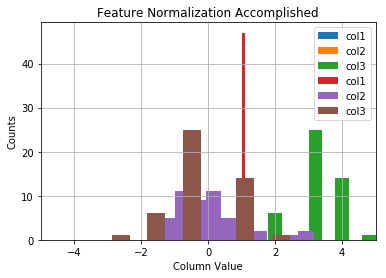

In [31]:
datafile = 'ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()
#对多属性的数据集进行正则化
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()




Check of result: What is price of house with 1650 square feet and 3 bedrooms?
293098.15
293081.46


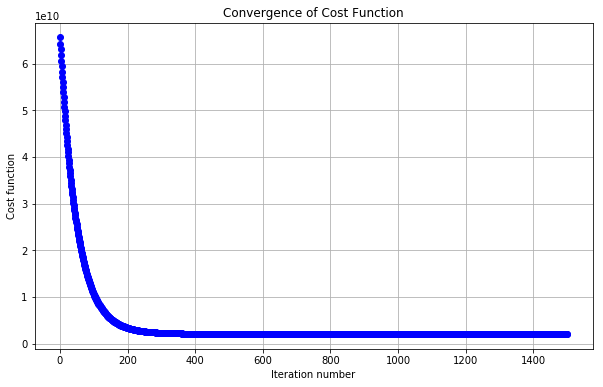

In [37]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = GrandientDesend(Xnorm,initial_theta)
plotConvergence(jvec)
#print "Final result theta parameters: \n",theta
print( "Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("%0.2f" % float(h(theta,ytestscaled)))

from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

print( "%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))